In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [46]:
intrusion = pd.read_csv('IntrusionDetection.csv')

In [47]:
intrusion.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [48]:
intrusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
duration                       25192 non-null int64
protocol_type                  25192 non-null object
service                        25192 non-null object
flag                           25192 non-null object
src_bytes                      25192 non-null int64
dst_bytes                      25192 non-null int64
land                           25192 non-null int64
wrong_fragment                 25192 non-null int64
urgent                         25192 non-null int64
hot                            25192 non-null int64
num_failed_logins              25192 non-null int64
logged_in                      25192 non-null int64
num_compromised                25192 non-null int64
root_shell                     25192 non-null int64
su_attempted                   25192 non-null int64
num_root                       25192 non-null int64
num_file_creations             25192 non-null int64
num_

In [49]:
intrusion.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [50]:
intrusion.shape

(25192, 42)

In [51]:
intrusion.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.084864,0.013258,-0.001012,-0.010358,-0.000486,0.004202,0.011108,-0.063703,0.095215,...,0.055174,-0.112530,-0.119321,0.263489,0.240970,-0.025485,-0.066513,-0.066240,0.187070,0.208435
src_bytes,0.084864,1.000000,0.003611,-0.000090,-0.000916,-0.000062,0.000995,-0.000260,-0.002040,-0.000196,...,-0.009764,-0.008520,-0.006776,0.001026,0.002316,-0.001238,-0.006346,-0.006227,-0.002130,0.006190
dst_bytes,0.013258,0.003611,1.000000,-0.000350,-0.003586,0.000345,0.002539,0.005197,0.012704,0.035852,...,-0.030930,-0.000980,0.022392,-0.012971,0.024078,-0.006006,-0.015584,-0.014543,-0.014094,-0.012803
land,-0.001012,-0.000090,-0.000350,1.000000,-0.000813,-0.000056,-0.000819,-0.000234,-0.007196,-0.000195,...,-0.016340,-0.008743,0.009531,-0.003929,0.024635,0.053037,0.014291,0.005596,-0.003432,-0.003335
wrong_fragment,-0.010358,-0.000916,-0.003586,-0.000813,1.000000,-0.000575,-0.008386,-0.002392,-0.073674,-0.001995,...,0.040020,-0.047256,-0.051845,0.053177,0.034670,-0.020174,-0.053786,-0.057230,0.027718,-0.034143
urgent,-0.000486,-0.000062,0.000345,-0.000056,-0.000575,1.000000,0.002346,-0.000165,0.007801,0.002886,...,0.004612,-0.006324,-0.007014,-0.002105,-0.003013,-0.001815,-0.004044,-0.003953,-0.002427,-0.002358
hot,0.004202,0.000995,0.002539,-0.000819,-0.008386,0.002346,1.000000,0.004893,0.113115,0.002005,...,-0.009083,-0.048495,-0.033442,-0.007962,-0.030640,-0.021170,-0.055628,-0.056255,-0.027628,-0.029719
num_failed_logins,0.011108,-0.000260,0.005197,-0.000234,-0.002392,-0.000165,0.004893,1.000000,-0.006872,0.015787,...,-0.026460,-0.022315,-0.003336,0.000298,-0.008910,-0.007551,-0.009527,-0.010238,0.016791,0.018693
logged_in,-0.063703,-0.002040,0.012704,-0.007196,-0.073674,0.007801,0.113115,-0.006872,1.000000,0.027083,...,-0.395905,0.624839,0.607379,-0.255820,-0.159278,-0.057390,-0.490450,-0.492446,-0.274430,-0.270507
num_compromised,0.095215,-0.000196,0.035852,-0.000195,-0.001995,0.002886,0.002005,0.015787,0.027083,1.000000,...,-0.015637,-0.018220,-0.011794,0.001757,-0.004146,0.013608,-0.007911,-0.007716,-0.007199,-0.004361


In [52]:
intrusion.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [53]:
missing_value = ["NaN", "NONE", "None", "Nil", "nan", "none", "nil"]
print("There are "+str(len(intrusion[intrusion.service.isin(missing_value)]))+" undefined values in the dataframe.")
intrusion[intrusion.service.isin(missing_value)]

There are 0 undefined values in the dataframe.


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class


In [54]:
for i in intrusion.columns:
    print(i)
    print(intrusion[i].dtype)
    print("There are "+str(len(intrusion[intrusion[i].isin(missing_value)]))+" undefined values in the column "+i)

duration
int64
There are 0 undefined values in the column duration
protocol_type
object
There are 0 undefined values in the column protocol_type
service
object
There are 0 undefined values in the column service
flag
object
There are 0 undefined values in the column flag
src_bytes
int64
There are 0 undefined values in the column src_bytes
dst_bytes
int64
There are 0 undefined values in the column dst_bytes
land
int64
There are 0 undefined values in the column land
wrong_fragment
int64
There are 0 undefined values in the column wrong_fragment
urgent
int64
There are 0 undefined values in the column urgent
hot
int64
There are 0 undefined values in the column hot
num_failed_logins
int64
There are 0 undefined values in the column num_failed_logins
logged_in
int64
There are 0 undefined values in the column logged_in
num_compromised
int64
There are 0 undefined values in the column num_compromised
root_shell
int64
There are 0 undefined values in the column root_shell
su_attempted
int64
There ar

In [55]:
desc=intrusion.describe()

In [56]:
type(desc)

pandas.core.frame.DataFrame

In [57]:
for i in desc.columns:
    print(desc[i])

count    25192.000000
mean       305.054104
std       2686.555640
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      42862.000000
Name: duration, dtype: float64
count    2.519200e+04
mean     2.433063e+04
std      2.410805e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.400000e+01
75%      2.790000e+02
max      3.817091e+08
Name: src_bytes, dtype: float64
count    2.519200e+04
mean     3.491847e+03
std      8.883072e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.302500e+02
max      5.151385e+06
Name: dst_bytes, dtype: float64
count    25192.000000
mean         0.000079
std          0.008910
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: land, dtype: float64
count    25192.000000
mean         0.023738
std          0.260221
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.00000

In [58]:
intrusion = intrusion.drop(['num_outbound_cmds','is_host_login'],axis=1)

In [59]:
intrusion['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [60]:

cols = intrusion.select_dtypes(include=['float64','int64']).columns


In [61]:
cols

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

In [62]:
scaler = MinMaxScaler()
scaled_numeric=scaler.fit_transform(intrusion[cols])

In [63]:
type(scaled_numeric)

numpy.ndarray

In [64]:
scaled_numeric = pd.DataFrame(scaled_numeric, columns = cols)

In [65]:
scaled_numeric.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,1.286320e-06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,3.824902e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,6.077927e-07,0.001583,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,5.213394e-07,0.000082,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [66]:

encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
categorical = intrusion.select_dtypes(include=['object']).copy()

# encode the categorical attributes
encoded_categorical = categorical.apply(encoder.fit_transform)


In [67]:
encoded_categorical

,protocol_type,service,flag,class
0,1,19,9,1
1,2,41,9,1
2,1,46,5,0
3,1,22,9,1
4,1,22,9,1
...,...,...,...,...
25187,1,16,2,0
25188,1,19,9,0
25189,1,46,1,0
25190,1,38,5,0


In [68]:
intrusion_detection = pd.concat([scaled_numeric,encoded_categorical],axis=1)

In [69]:
intrusion_detection.shape

(25192, 40)

In [70]:
intrusion_detection.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,class
0,0.0,1.286320e-06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.17,0.00,0.00,0.00,0.05,0.00,1,19,9,1
1,0.0,3.824902e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.88,0.00,0.00,0.00,0.00,0.00,2,41,9,1
2,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,46,5,0
3,0.0,6.077927e-07,0.001583,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.03,0.04,0.03,0.01,0.00,0.01,1,22,9,1
4,0.0,5.213394e-07,0.000082,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,1,22,9,1


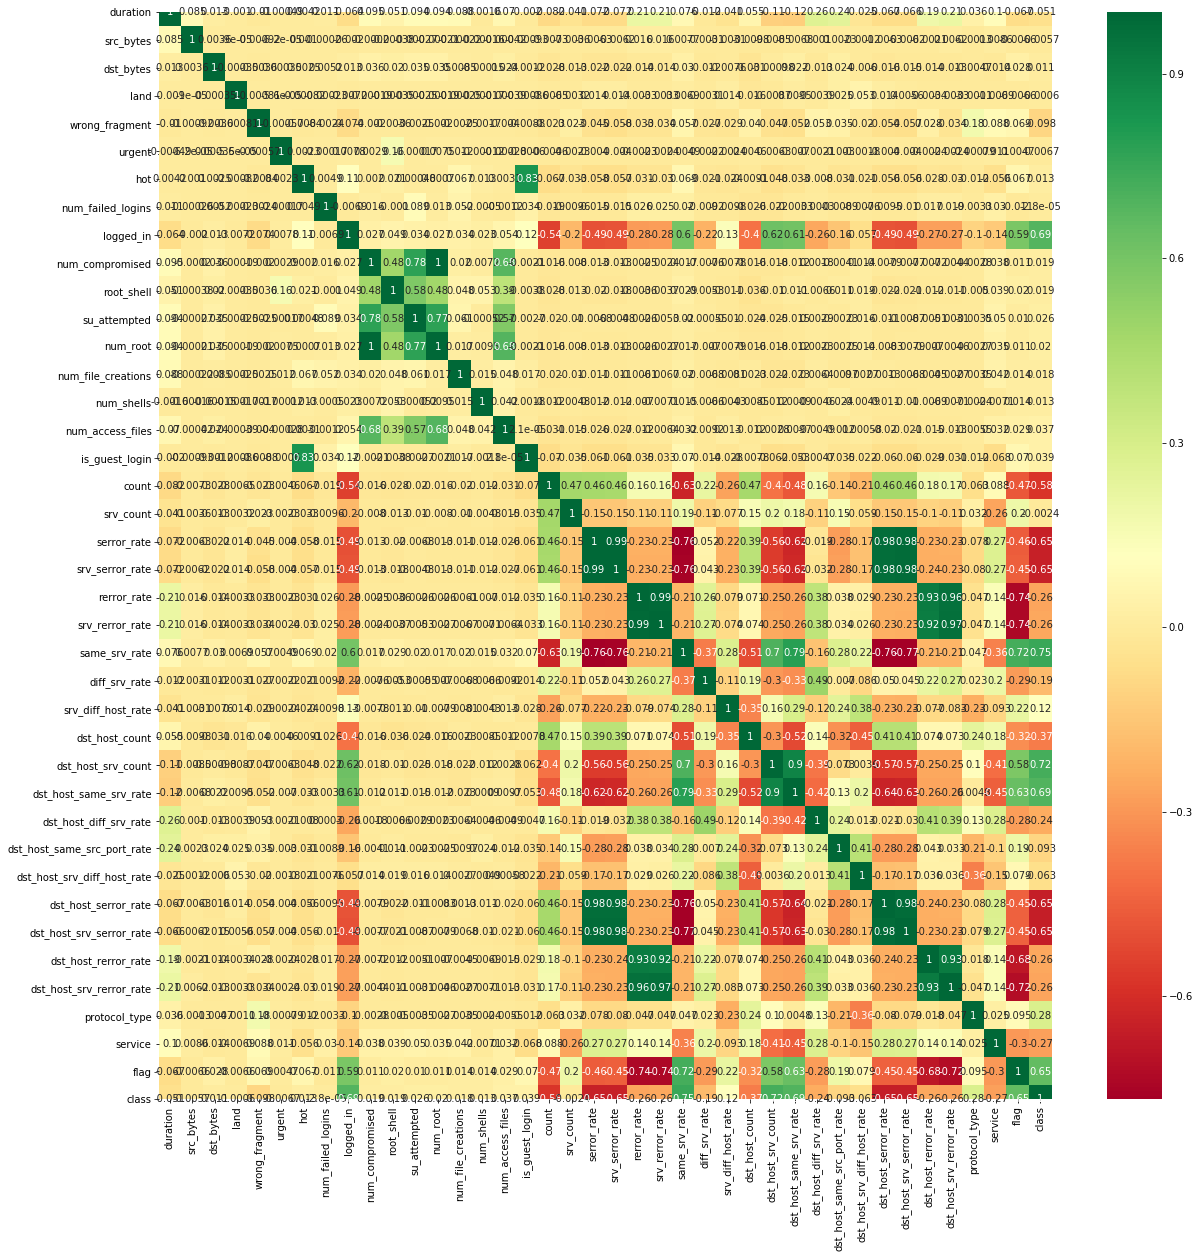

In [71]:
corrmat = intrusion_detection.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(intrusion_detection[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [72]:
intrusion_detection_y = intrusion_detection['class']
intrusion_detection_X = intrusion_detection.drop(['class'],axis=1)

In [73]:
intrusion_detection_y

0        1
1        1
2        0
3        1
4        1
        ..
25187    0
25188    0
25189    0
25190    0
25191    0
Name: class, Length: 25192, dtype: int32

In [74]:
intrusion_detection_y.shape

(25192,)

In [75]:
intrusion_detection_X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,0.0,1.286320e-06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1,19,9
1,0.0,3.824902e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,2,41,9
2,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,46,5
3,0.0,6.077927e-07,0.001583,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1,22,9
4,0.0,5.213394e-07,0.000082,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,22,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1,16,2
25188,0.0,8.750119e-07,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1,19,9
25189,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1,46,1
25190,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1,38,5


In [76]:
intrusion_detection_X.shape

(25192, 39)

In [77]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(intrusion_detection_X, intrusion_detection_y, test_size=0.20 ,random_state=1)

In [78]:
X_train.shape

(20153, 39)

In [79]:
X_test.shape

(5039, 39)

In [80]:
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(40,'Score'))  


                          Specs         Score
37                      service  12423.848090
38                         flag   8735.427815
33     dst_host_srv_serror_rate   6125.777149
20              srv_serror_rate   5966.734094
19                  serror_rate   5950.089228
32         dst_host_serror_rate   5929.684257
8                     logged_in   5784.140960
27           dst_host_srv_count   4364.843178
28       dst_host_same_srv_rate   3754.610379
23                same_srv_rate   3294.043848
17                        count   2079.024313
22              srv_rerror_rate   1125.842681
21                  rerror_rate   1124.964591
35     dst_host_srv_rerror_rate   1122.506662
34         dst_host_rerror_rate   1046.781089
26               dst_host_count    581.120755
29       dst_host_diff_srv_rate    495.019328
24                diff_srv_rate    379.811170
36                protocol_type    275.911624
4                wrong_fragment    192.182783
25           srv_diff_host_rate   

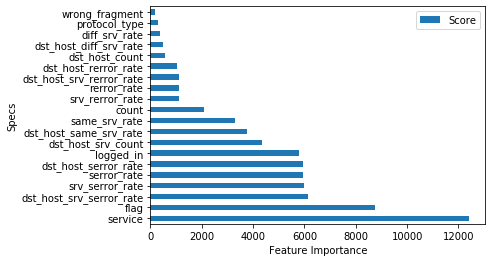

In [81]:
featureScores=featureScores.set_index('Specs')
featureScores.nlargest(20,'Score').plot(kind='barh').set(xLabel='Feature Importance')
plt.show()

In [82]:
X_train=X_train[featureScores.nlargest(20,'Score').index]

In [83]:
X_test=X_test[featureScores.nlargest(20,'Score').index]

In [84]:
X_train.shape

(20153, 20)

In [85]:
X_train.dtypes

service                       int32
flag                          int32
dst_host_srv_serror_rate    float64
srv_serror_rate             float64
serror_rate                 float64
dst_host_serror_rate        float64
logged_in                   float64
dst_host_srv_count          float64
dst_host_same_srv_rate      float64
same_srv_rate               float64
count                       float64
srv_rerror_rate             float64
rerror_rate                 float64
dst_host_srv_rerror_rate    float64
dst_host_rerror_rate        float64
dst_host_count              float64
dst_host_diff_srv_rate      float64
diff_srv_rate               float64
protocol_type                 int32
wrong_fragment              float64
dtype: object

In [86]:
Selected_features = featureScores.nlargest(20,'Score').index

In [87]:
for i in Selected_features:
    print(i)

service
flag
dst_host_srv_serror_rate
srv_serror_rate
serror_rate
dst_host_serror_rate
logged_in
dst_host_srv_count
dst_host_same_srv_rate
same_srv_rate
count
srv_rerror_rate
rerror_rate
dst_host_srv_rerror_rate
dst_host_rerror_rate
dst_host_count
dst_host_diff_srv_rate
diff_srv_rate
protocol_type
wrong_fragment


In [100]:

LogisticRegressionClf = LogisticRegression(solver='liblinear',C=10)
LogisticRegressionClf.fit(X_train, y_train);


In [101]:
scores = cross_val_score(LogisticRegressionClf, X_train, y_train, cv=10)
accuracy = metrics.accuracy_score(y_train, LogisticRegressionClf.predict(X_train))
confusion_matrix = metrics.confusion_matrix(y_train, LogisticRegressionClf.predict(X_train))
classification = metrics.classification_report(y_train, LogisticRegressionClf.predict(X_train))

In [102]:
print("On training")

print ("Cross Validation Mean Score:" , scores.mean())
   
print ("Model Accuracy:" , accuracy)
   
print("Confusion matrix: \n" , confusion_matrix)
   
print("Classification report:\n" , classification) 
 

On training
Cross Validation Mean Score: 0.949188969632518
Model Accuracy: 0.9494864288195306
Confusion matrix: 
 [[ 8745   645]
 [  373 10390]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      9390
           1       0.94      0.97      0.95     10763

    accuracy                           0.95     20153
   macro avg       0.95      0.95      0.95     20153
weighted avg       0.95      0.95      0.95     20153



In [91]:
scores = cross_val_score(LogisticRegressionClf, X_train, y_train, cv=10)
accuracy = metrics.accuracy_score(y_test, LogisticRegressionClf.predict(X_test))
confusion_matrix = metrics.confusion_matrix(y_test, LogisticRegressionClf.predict(X_test))
classification = metrics.classification_report(y_test, LogisticRegressionClf.predict(X_test))

In [92]:
print("On testing")

print ("Cross Validation Mean Score:" , scores.mean())
   
print ("Model Accuracy:" , accuracy)
   
print("Confusion matrix: \n" , confusion_matrix)
   
print("Classification report:\n" , classification) 
 

On testing
Cross Validation Mean Score: 0.9492386220410415
Model Accuracy: 0.9470132962889463
Confusion matrix: 
 [[2178  175]
 [  92 2594]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      2353
           1       0.94      0.97      0.95      2686

    accuracy                           0.95      5039
   macro avg       0.95      0.95      0.95      5039
weighted avg       0.95      0.95      0.95      5039



In [93]:
KNN_Classifier = KNeighborsClassifier()
KNN_Classifier.fit(X_train, y_train); 


In [94]:
scores = cross_val_score(KNN_Classifier, X_train, y_train, cv=10)
accuracy = metrics.accuracy_score(y_train, KNN_Classifier.predict(X_train))
confusion_matrix = metrics.confusion_matrix(y_train, KNN_Classifier.predict(X_train))
classification = metrics.classification_report(y_train, KNN_Classifier.predict(X_train))

In [95]:
print("On training")
print ("Cross Validation Mean Score:" , scores.mean())
   
print ("Model Accuracy:" , accuracy)
   
print("Confusion matrix: \n" , confusion_matrix)
   
print("Classification report:\n" , classification) 

On training
Cross Validation Mean Score: 0.9868010260348969
Model Accuracy: 0.9923088373939364
Confusion matrix: 
 [[ 9293    97]
 [   58 10705]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      9390
           1       0.99      0.99      0.99     10763

    accuracy                           0.99     20153
   macro avg       0.99      0.99      0.99     20153
weighted avg       0.99      0.99      0.99     20153



In [96]:
scores = cross_val_score(KNN_Classifier, X_train, y_train, cv=10)
accuracy = metrics.accuracy_score(y_test, KNN_Classifier.predict(X_test))
confusion_matrix = metrics.confusion_matrix(y_test, KNN_Classifier.predict(X_test))
classification = metrics.classification_report(y_test, KNN_Classifier.predict(X_test))

In [97]:
print("On testing")
print ("Cross Validation Mean Score:" , scores.mean())
   
print ("Model Accuracy:" , accuracy)
   
print("Confusion matrix: \n" , confusion_matrix)
   
print("Classification report:\n" , classification) 

On testing
Cross Validation Mean Score: 0.9868010260348969
Model Accuracy: 0.9853145465370113
Confusion matrix: 
 [[2305   48]
 [  26 2660]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2353
           1       0.98      0.99      0.99      2686

    accuracy                           0.99      5039
   macro avg       0.99      0.98      0.99      5039
weighted avg       0.99      0.99      0.99      5039

